In [1]:
from IPython.display import Image

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# 3.4 서포트 벡터 머신을 사용한 최대 마신 분류
* 서포트 벡터 머신(Support Vector Machine, SVM)
    * 퍼셉트론의 확장
    * 최적화 대상 = 마진 최대화
    * 마진 : 클래스를 구분하는 초평면(결정 경계, hyperplane)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의
        * 이런 샘플을 서포트 벡터라 한다.


In [4]:
Image(url='https://git.io/Jtm2r', width=700)

### 3.4.1 최대 마진
* 큰 마진(large margin)의 결정 경계를 원하는 이유 = 일반화 오차가 낮아지는 경향이 있기 때문
    * 작은 마진의 모델은 과대적합되기 쉬움
* 양성 쪽 초평면 : $w_0+\boldsymbol{w}^T\boldsymbol{x}_{pos}=1$
* 음성 쪽 초평면 : $w_0+\boldsymbol{w}^T\boldsymbol{x}_{neg}=-1$

두 선형식을 빼면, $\boldsymbol{w}^T(\boldsymbol{x}_{pos}-\boldsymbol{x}_{neg})=2$

=> 가중치의 L2 규제로 나눈다 -> $\dfrac{\boldsymbol{w}^T(\boldsymbol{x}_{pos}-\boldsymbol{x}_{neg})}{\lVert \boldsymbol w \rVert}=\dfrac{2}{\lVert \boldsymbol w \rVert}$

결국 SVM은 $\dfrac{2}{\lVert \boldsymbol w \rVert}$을 최대함으로써 마진을 최대화 하는 것.

실제로는 동일한 효과를 내면서 콰드라틱 프로그래밍(quadratic programming) 방법으로 풀 수 있는 $\dfrac{1}{2}\lVert \boldsymbol w \rVert^2=\dfrac{1}{2}\boldsymbol w^T \boldsymbol w$를 최소화하는 것이 더 쉽다.

### 3.4.1 슬랙 변수를 사용하여 비선형 분류 문제 다루기
* 슬랙 변수 : $\zeta$
* 소프트 마진 분류(soft margin classification)
* 슬랙 변수는 선형적으로 구준되지 않은 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입되었다.
    * 적절한 비용을 손해 보면서 분류 오차가 있는 상황에서 최적화 알고리즘 수렴
* 양성 샘플일 경우 ($y^{(i)}$ = 1)
    * $w_0+\boldsymbol w^T \boldsymbol x^{(i)} \ge 1-\zeta^{(i)}$
* 음성 샘플일 경우 ($y^{(i)}$ = -1)
    * $w_0+\boldsymbol w^T \boldsymbol x^{(i)} \le -1+\zeta^{(i)}$
* 목적 함수 : $\dfrac{1}{2} \boldsymbol w^T \boldsymbol w+C\sum_i \zeta^{(i)}$


In [5]:
Image(url='https://git.io/Jtm26', width=600) 

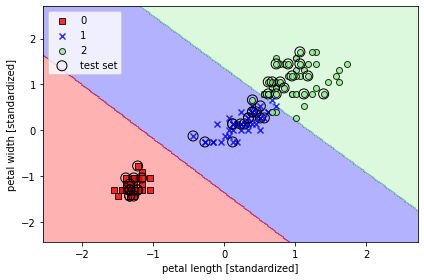

In [6]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

* 로지스틱 회귀 vs 서포트 벡터 머신
    * 로지스틱 회귀는 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM보다 이상치에 민감.
    * SVM은 결정 경계에 가까운 포인트(서포트 벡터)에 대부분 관심을 둠.
    * 로지스틱 회귀는 모델이 간단하고 구련하기 더 쉽고, 업데이터가 용이해 스트리밍 데이터를 다룰 때 적합

### 3.4.3 사이킷런의 다른 구현

* 사이킷런의 LogisticRegression 클래스는 LIBLINEAR 라이브러리를 사용
* 사이킷런의 SVM을 훈련하는 SVC 클래스는 LIBSVM 라이브러리를 사용
* 위 라이브러리는 많은 선형 분류기를 아주 빠르게 훈련할 수 있는 장점이 있다.
    * 하지만 데이터셋이 너무 클 때, 컴퓨터 메모리 용량에 맞지 않는 경우가 있음.
    * 사이킷런은 이에 대한 대안으로 **SGDClassifier** 클래스 제공.
        * partial_fit 메서드를 사용하여 온라인 학습을 지원.
        

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

ppn = Perceptron(eta0=0.1, random_state=1) # Perceptron
lr = LogisticRegression(C=100.0, random_state=1) # LogisticRegression
svm = SVC(kernel='linear', C=1.0, random_state=1) # SVM

from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron') # Perceptron
lr = SGDClassifier(loss='log') # LogisticRegression
svm = SGDClassifier(loss='hinge') # SVM

# 3.5 커널 SVM을 사용하여 비선형 문제 풀기

### 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법
* logical_xor 함수를 사용하여 XOR 형태의 간단한 합성 데이터셋을 만듬.
    * 대략 100개의 샘플은 클래스 레이블 1로 할당, 나머지 100개의 샘플은 클래스 레이블로 -1로 할당.
    

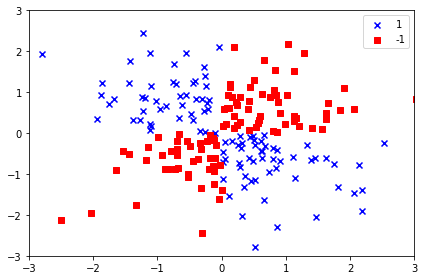

In [8]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

위 데이터는 양성 클래스와 음성 클래스를 선형 초평면으로 구분할 수 없다. - 선형 로지스틱 회귀 or 선형 SVM

이렇게 선형적으로 구분되지 않는 데이터를 다루는 커널 방법(kernel method)의 기본 아이디어는 매핑 함수 $\phi$을 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영하는 것.

* 2차원 데이터셋을 투영을 통해 새로운 3차원 특성 공간으로 변환하면 클래스를 구분할 수 있다.
    * $\phi(x_1, x_2)=(x_1, x_2, x_1^2+x_2^2)$

고차원 공간에서 두 클래스를 구분하는 선형 초평면은 원본 특성 공간으로 되돌리면 비선형 결정 경계가 된다.

In [9]:
Image(url='https://git.io/Jtm2X', width=700) 

### 3.5.2 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기
* SVM으로 비선형 문제 풀기
    1. 매핑 함수를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환
    2. 이 새로운 특성 공간에서 데이터를 분류하는 선형 SVM 모델을 훈련
    3. 동일한 매핑 함수를 사용하여 새로운 본 적 없는 데이터를 변환하고 선형 SVM 모델을 사용하여 분류
* 이런 매핑 방식의 문제점
    * 새로운 특성을 만드는 계산 비용이 매우 비싸다.
        * 고차원 데이터일수록 더 하다.
* 커널 기법(kernel trick) 중 방사 기저 함수(Radial Basis Function, RBF) = 가우시안 커널(Gaussian kernel)
    * 방사 기저 함수(Radial Basis Function) : $K(\boldsymbol x^{(i)}, \boldsymbol x^{(j)})=\text{exp}\left(-\dfrac{1}{2\sigma^2}\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2\right)=\text{exp}\left( -\gamma\lVert \boldsymbol x^{(i)}-\boldsymbol x^{(j)} \rVert^2 \right)$

여기서 $\gamma=\dfrac{1}{2\sigma^2}$은 최적화 대상 파라미터가 아니다.

커널이란 용어를 샘플 간의 유사도 함수(similarity function)로 해석 가능. 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할을 한다. 지수 함수로 얻게 되는 유사도 점수는 1(매우 비슷한 샘플)과 0(매우 다른 샘플) 사이 범위를 가진다.

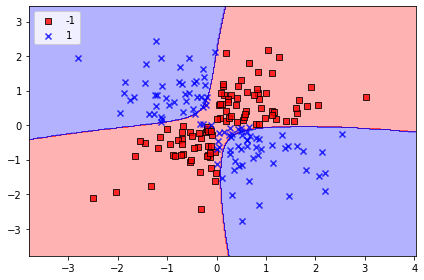

In [10]:
# gamma=0.1 : 가우시안 구(Gaussian shpere)의 제한하는 매개변수
# gamma를 크게 하면 서포트 벡터의 영향이나 범위가 줄어든다.
# 결정 경계는 더욱 샘플에 가까워지고 구불구불해진다.
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) # kernel='linear'에서 'rbf'로
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

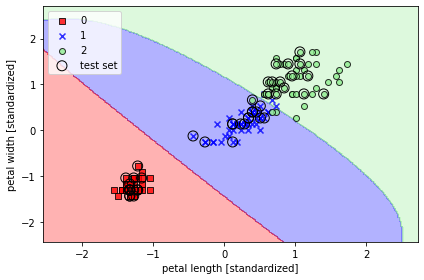

In [11]:
# gamma 이해
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* gamma 값을 비교적 작게 했기 때문에 RBF 커널 SVM 모델이 만든 결정 경계는 위와 같이 부드럽다.
* gamma 값을 크게하고 결정 경계에 미치는 영향 확인.

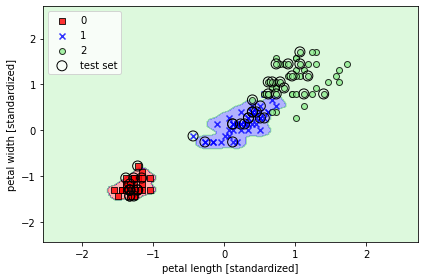

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

이런 것은 훈련 데이터에서는 잘 맞지만, 본 적 없는 데이터셋에서는 일반화 오차가 높을 것이다. 알고리즘이 훈련 데이터셋 변화에 너무 민감할 때 $\gamma$ 매개변수가 과대적합 또는 분산을 조절하는 중요한 역할도 한다는 것을 알 수 있다.